In [161]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
import pandas
from pandas import DataFrame
from pandas import concat
from pandas import Series
import matplotlib.pyplot as plt
import numpy
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import tensorflow
#import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
df_m=read_csv(r"C:\Users\ldr\Desktop\NC project\Donation_data_monthly1.csv", usecols=[1,2])

In [4]:
print(df_m.head(5))

         Date   Quantity
0  2006-07-15  3033041.0
1  2006-08-15  2389606.0
2  2006-09-15  2148315.0
3  2006-10-15  2437946.0
4  2006-11-15  2348064.0


In [5]:
import tensorflow.keras as kera
import pandas as pd

In [6]:
df_m.index.name="Date"

In [7]:
quantity=df_m['Quantity']

In [8]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [9]:
df_m['Date']=df_m['Date'].astype("string")

In [10]:
quantity=quantity.astype('float32')

In [11]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [13]:
n_steps=30
X,y = split_sequence(quantity, n_steps)

In [14]:
n_features=1
X=X.reshape(X.shape[0], X.shape[1], n_features)

In [15]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.fit(X,y, epochs=200, verbose=0)

In [17]:
yhat=list()
for i in range(len(X)):
    x_input=X[i]
    input = x_input.reshape((1, n_steps, n_features))
    yhat.append(model.predict(input,verbose=0))

In [18]:
print(yhat[1])

[[2919704.5]]


In [43]:
X[1].shape

(30, 1)

In [ ]:
## LSTS Model for univariate data

In [3]:
series=read_csv(r"C:\Users\ldr\Desktop\NC project\Donation_data_monthly1.csv", usecols=[1,2], index_col=0, parse_dates=[0], header=0, squeeze=True)

In [88]:
print(series.head())

Date
2006-07-15    3033041.0
2006-08-15    2389606.0
2006-09-15    2148315.0
2006-10-15    2437946.0
2006-11-15    2348064.0
Name: Quantity, dtype: float64


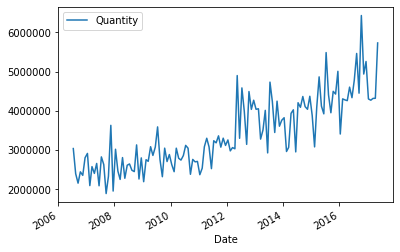

In [42]:
series.plot()
pyplot.show()

In [90]:
X0=series.values
train, test=X0[0:-12],X0[-12:]

In [91]:
history=[x for x in train]
predictions=[]

In [92]:
#baseline predictions
for i in range(len(test)):
	predictions.append(history[-1])
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 956161.301


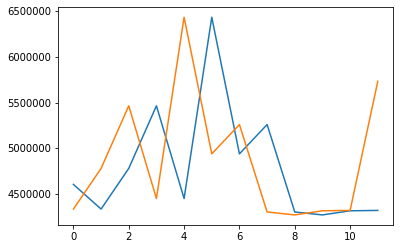

In [93]:
pyplot.plot(predictions)
pyplot.plot(test1)
pyplot.show()

In [94]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [95]:
supervised = timeseries_to_supervised(X0, 30)

In [96]:
#transform to stationary

           0          0          0          0    0    0    0    0    0    0  \
0        0.0        0.0        0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  3033041.0        0.0        0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  2389606.0  3033041.0        0.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  2148315.0  2389606.0  3033041.0        0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  2437946.0  2148315.0  2389606.0  3033041.0  0.0  0.0  0.0  0.0  0.0  0.0   

   ...    0    0    0    0    0    0    0    0    0          0  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3033041.0  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2389606.0  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2148315.0  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2437946.0  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2348064.0  

[5 rows x 31 columns]


In [102]:
from pandas import Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [103]:
differenced=difference(series, interval=1)

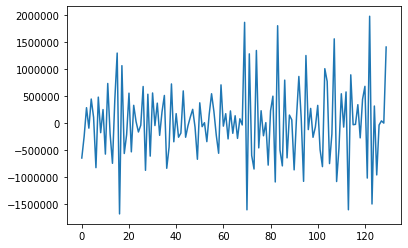

In [105]:
differenced.plot()
pyplot.show()

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
X0=series.values
print(X0)

[3033041.   2389606.   2148315.   2437946.   2348064.   2798225.
 2908455.   2086222.   2571666.   2397932.   2652652.   2081479.
 2820005.   2624668.   1882946.   2324066.   3626400.   1946585.
 3015340.   2455712.   2243837.   2802564.   2273452.04 2606984.
 2639280.   2478267.   2443774.   3126216.   2254898.   2794201.
 2185955.   2748290.   2706619.45 3080468.   2857327.   3070516.5
 3586771.   2752973.   2313390.   3043313.   2700880.   2880245.
 2622454.   2441515.   3042585.   2784087.   2738525.   2854728.
 3113947.   3041793.   2375121.   2755087.   2693112.   2704534.
 2364813.   2530949.   3079055.   3296510.   3075111.   2519447.
 3232126.   3179506.   3357886.   3068599.   3298326.   3112881.
 3252912.   2973606.   3057455.   3027115.   4898806.   3294982.
 4582990.   3987754.   3140163.   4490478.   4034733.5  4268013.
 4037053.   4049558.   3274395.   3506159.   4009411.   2921969.
 4731011.5  4233269.   3443807.   4244808.   3604119.   3756742.
 3820892.   2957826.   3

In [125]:
X0=X0.reshape(len(X0),1)
print(X0)

[[3033041.  ]
 [2389606.  ]
 [2148315.  ]
 [2437946.  ]
 [2348064.  ]
 [2798225.  ]
 [2908455.  ]
 [2086222.  ]
 [2571666.  ]
 [2397932.  ]
 [2652652.  ]
 [2081479.  ]
 [2820005.  ]
 [2624668.  ]
 [1882946.  ]
 [2324066.  ]
 [3626400.  ]
 [1946585.  ]
 [3015340.  ]
 [2455712.  ]
 [2243837.  ]
 [2802564.  ]
 [2273452.04]
 [2606984.  ]
 [2639280.  ]
 [2478267.  ]
 [2443774.  ]
 [3126216.  ]
 [2254898.  ]
 [2794201.  ]
 [2185955.  ]
 [2748290.  ]
 [2706619.45]
 [3080468.  ]
 [2857327.  ]
 [3070516.5 ]
 [3586771.  ]
 [2752973.  ]
 [2313390.  ]
 [3043313.  ]
 [2700880.  ]
 [2880245.  ]
 [2622454.  ]
 [2441515.  ]
 [3042585.  ]
 [2784087.  ]
 [2738525.  ]
 [2854728.  ]
 [3113947.  ]
 [3041793.  ]
 [2375121.  ]
 [2755087.  ]
 [2693112.  ]
 [2704534.  ]
 [2364813.  ]
 [2530949.  ]
 [3079055.  ]
 [3296510.  ]
 [3075111.  ]
 [2519447.  ]
 [3232126.  ]
 [3179506.  ]
 [3357886.  ]
 [3068599.  ]
 [3298326.  ]
 [3112881.  ]
 [3252912.  ]
 [2973606.  ]
 [3057455.  ]
 [3027115.  ]
 [4898806.  ]
 [3294

In [131]:
scaler=MinMaxScaler(feature_range=(-1,1))

scaled_X0=scaler.fit_transform(X0)

In [132]:
#X1=scaler.inverse_transform(scaled_X0) identical to X0

### Begin the Whole Process

In [82]:
# load in data
series=read_csv(r"C:\Users\ldr\Desktop\NC project\Donation_data_monthly1.csv", usecols=[1,2], index_col=0, parse_dates=[0], header=0, squeeze=True)

In [83]:
print(series)

Date
2006-07-15    3033041.0
2006-08-15    2389606.0
2006-09-15    2148315.0
2006-10-15    2437946.0
2006-11-15    2348064.0
                ...    
2017-01-15    4301305.0
2017-02-15    4269067.0
2017-03-15    4314227.0
2017-04-15    4318213.0
2017-05-15    5732314.0
Name: Quantity, Length: 131, dtype: float64


In [84]:
# stationary
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

raw_values = series.values
diff_values = difference(raw_values, 1)

In [85]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 30) #try 30 later
supervised_values = supervised.values

In [86]:
# split data into train and test-sets
train, test = supervised_values[0:-24], supervised_values[-24:]

In [87]:
type(train)

numpy.ndarray

In [88]:
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [89]:
print(train_scaled)

[[-0.05402666 -0.05402666 -0.05402666 ... -0.05402666 -0.05402666
  -0.41637153]
 [-0.41637153 -0.05402666 -0.05402666 ... -0.05402666 -0.05402666
  -0.18990761]
 [-0.18990761 -0.41637153 -0.05402666 ... -0.05402666 -0.05402666
   0.10907654]
 ...
 [-0.50628325 -0.33037008  0.13312249 ...  0.7063916  -0.53134023
   0.5163922 ]
 [ 0.5163922  -0.50628325 -0.33037008 ... -0.31067525  0.7063916
   0.38330725]
 [ 0.38330725  0.5163922  -0.50628325 ...  0.07734268 -0.31067525
  -0.47441057]]


In [90]:
print(train_scaled[:,0])

[-0.05402666 -0.41637153 -0.18990761  0.10907654 -0.10464293  0.19947763
  0.00804842 -0.51706009  0.21934695 -0.15186346  0.08941672 -0.37567781
  0.36186789 -0.16402901 -0.47172101  0.19438627  0.67937151 -1.
  0.54783351 -0.36917634 -0.17334224  0.26061564 -0.3519915   0.13379899
 -0.03583944 -0.14469974 -0.07345109  0.33028467 -0.54470188  0.24967718
 -0.39655515  0.26264745 -0.07749307  0.15650293 -0.17968659  0.06602917
  0.23669762 -0.52357282 -0.30157404  0.35702319 -0.24686485  0.0469812
 -0.19919944 -0.1559209   0.28446073 -0.19959758 -0.07968451  0.01141206
  0.09195029 -0.09465956 -0.42945725  0.15994792 -0.08892735 -0.04759446
 -0.24533761  0.0395314   0.25463451  0.06843125 -0.1787056  -0.36694405
  0.34731238 -0.08365916  0.0464265  -0.21693614  0.07534212 -0.15845841
  0.02483059 -0.21131543 -0.00680782 -0.07111237  1.         -0.95720632
  0.67130395 -0.38922868 -0.53134023  0.7063916  -0.31067525  0.07734268
 -0.18408979 -0.04698457 -0.49055302  0.07648924  0.22937537

In [52]:
# build LSTM model
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch): # recyle times
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [53]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 300, 4)

In [59]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, :-1].reshape(len(train_scaled), 1,30)
lstm_model.predict(train_reshaped, batch_size=1)

array([[-3.95198047e-01],
       [-2.96957549e-02],
       [-2.00491399e-04],
       [-8.10251087e-02],
       [ 1.27136171e-01],
       [-5.23730442e-02],
       [-5.25559485e-01],
       [ 1.56756654e-01],
       [-2.04134241e-01],
       [ 2.92315669e-02],
       [-4.01219338e-01],
       [ 2.93272555e-01],
       [-2.15767786e-01],
       [-5.12327492e-01],
       [ 1.70120016e-01],
       [ 6.25028491e-01],
       [-1.03664219e+00],
       [ 5.28727055e-01],
       [-3.96011025e-01],
       [-1.95127353e-01],
       [ 2.41941795e-01],
       [-3.82019758e-01],
       [ 1.05301276e-01],
       [-6.58145696e-02],
       [-1.72224283e-01],
       [-1.38319775e-01],
       [ 2.99971789e-01],
       [-5.89665532e-01],
       [ 1.79758295e-01],
       [-4.44144338e-01],
       [ 1.83902875e-01],
       [-1.43408820e-01],
       [ 1.30780175e-01],
       [-2.34706447e-01],
       [-2.35962104e-02],
       [ 2.12142482e-01],
       [-6.11892998e-01],
       [-3.03907573e-01],
       [ 3.0

In [60]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

In [61]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [62]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [63]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Month=1, Predicted=2648515.352018, Expected=3920419.000000
Month=2, Predicted=3093121.592482, Expected=5486601.220000
Month=3, Predicted=2605413.174495, Expected=4407472.000000
Month=4, Predicted=6403580.537091, Expected=3947907.000000
Month=5, Predicted=3841522.555574, Expected=4495724.000000
Month=6, Predicted=2544422.226570, Expected=4425830.000000
Month=7, Predicted=4322559.936658, Expected=5007392.860000
Month=8, Predicted=4647524.102665, Expected=3404507.500000
Month=9, Predicted=3072859.404489, Expected=4303216.000000
Month=10, Predicted=5131654.747994, Expected=4277253.000000
Month=11, Predicted=5245326.986480, Expected=4257763.000000
Month=12, Predicted=4596870.714979, Expected=4602992.000000
Month=13, Predicted=4129023.822788, Expected=4333075.000000
Month=14, Predicted=5532994.069032, Expected=4778362.000000
Month=15, Predicted=3823578.557302, Expected=5463750.000000
Month=16, Predicted=4500064.938654, Expected=4448565.000000
Month=17, Predicted=2694528.777467, Expected=6433

Test RMSE: 1474962.754


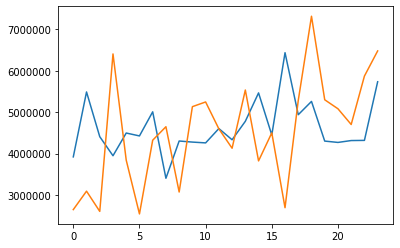

In [64]:

# report performance
rmse = sqrt(mean_squared_error(raw_values[-24:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-24:])
pyplot.plot(predictions)
pyplot.show()

### Other ways

In [162]:
series=read_csv(r"C:\Users\ldr\Desktop\NC project\Donation_data_monthly1.csv", usecols=[1,2],index_col=0, header=0)

In [163]:
print(series)

             Quantity
Date                 
2006-07-15  3033041.0
2006-08-15  2389606.0
2006-09-15  2148315.0
2006-10-15  2437946.0
2006-11-15  2348064.0
...               ...
2017-01-15  4301305.0
2017-02-15  4269067.0
2017-03-15  4314227.0
2017-04-15  4318213.0
2017-05-15  5732314.0

[131 rows x 1 columns]


In [164]:
# stationary
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

raw_values = series.values
diff_values = difference(raw_values, 1)
diff_values=diff_values.values

In [165]:
print(diff_values)
type(diff_values)

[array([-643435.]) array([-241291.]) array([289631.]) array([-89882.])
 array([450161.]) array([110230.]) array([-822233.]) array([485444.])
 array([-173734.]) array([254720.]) array([-571173.]) array([738526.])
 array([-195337.]) array([-741722.]) array([441120.]) array([1302334.])
 array([-1679815.]) array([1068755.]) array([-559628.]) array([-211875.])
 array([558727.]) array([-529111.96]) array([333531.96]) array([32296.])
 array([-161013.]) array([-34493.]) array([682442.]) array([-871318.])
 array([539303.]) array([-608246.]) array([562335.]) array([-41670.55])
 array([373848.55]) array([-223141.]) array([213189.5]) array([516254.5])
 array([-833798.]) array([-439583.]) array([729923.]) array([-342433.])
 array([179365.]) array([-257791.]) array([-180939.]) array([601070.])
 array([-258498.]) array([-45562.]) array([116203.]) array([259219.])
 array([-72154.]) array([-666672.]) array([379966.]) array([-61975.])
 array([11422.]) array([-339721.]) array([166136.]) array([548106.])


numpy.ndarray

In [166]:
# split data into train and test-sets
train, test = diff_values[0:-24], diff_values[-24:]

In [167]:
type(train)
train.shape

(106,)

In [168]:
# transform the scale of the data
scaler=MinMaxScaler(feature_range=(0,1))
train=train.reshape(-1,1)
test=test.reshape(-1,1)
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.fit_transform(test)

In [169]:
print(train_scaled)

[[0.29181423]
 [0.4050462 ]
 [0.55453827]
 [0.44767853]
 [0.59973882]
 [0.50402421]
 [0.24146996]
 [0.60967347]
 [0.42406827]
 [0.54470836]
 [0.31216109]
 [0.68093395]
 [0.4179855 ]
 [0.26413949]
 [0.59719313]
 [0.83968576]
 [0.        ]
 [0.77391676]
 [0.31541183]
 [0.41332888]
 [0.63030782]
 [0.32400425]
 [0.5668995 ]
 [0.48208028]
 [0.42765013]
 [0.46327445]
 [0.66514234]
 [0.22764906]
 [0.62483859]
 [0.30172242]
 [0.63132373]
 [0.46125347]
 [0.57825147]
 [0.41015671]
 [0.53301459]
 [0.61834881]
 [0.23821359]
 [0.34921298]
 [0.67851159]
 [0.37656757]
 [0.5234906 ]
 [0.40040028]
 [0.42203955]
 [0.64223037]
 [0.40020121]
 [0.46015775]
 [0.50570603]
 [0.54597514]
 [0.45267022]
 [0.28527138]
 [0.57997396]
 [0.45553633]
 [0.47620277]
 [0.37733119]
 [0.5197657 ]
 [0.62731726]
 [0.53421563]
 [0.4106472 ]
 [0.31652797]
 [0.67365619]
 [0.45817042]
 [0.52321325]
 [0.39153193]
 [0.53767106]
 [0.42077079]
 [0.5124153 ]
 [0.39434229]
 [0.49659609]
 [0.46444382]
 [1.        ]
 [0.02139684]
 [0.83

In [170]:
import numpy as np
X_train = []
y_train = []
for i in range(12, len(train_scaled)):
    X_train.append(train_scaled[i-12:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))  

In [171]:
import numpy as np
X_test = []
y_test = []
for i in range(12, len(test_scaled)):
    X_test.append(test_scaled[i-12:i, 0])
    y_test.append(test_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))  

In [172]:
X_train.shape


(94, 1, 12)

In [173]:
regressor = Sequential()

regressor.add(LSTM(units = 50,input_shape = (X_train.shape[1],X_train.shape[2])))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 1000, batch_size = 32, verbose=2, shuffle=False)

Train on 94 samples
Epoch 1/1000
94/94 - 2s - loss: 0.2083
Epoch 2/1000
94/94 - 0s - loss: 0.1615
Epoch 3/1000
94/94 - 0s - loss: 0.1225
Epoch 4/1000
94/94 - 0s - loss: 0.0915
Epoch 5/1000
94/94 - 0s - loss: 0.0682
Epoch 6/1000
94/94 - 0s - loss: 0.0523
Epoch 7/1000
94/94 - 0s - loss: 0.0429
Epoch 8/1000
94/94 - 0s - loss: 0.0389
Epoch 9/1000
94/94 - 0s - loss: 0.0385
Epoch 10/1000
94/94 - 0s - loss: 0.0397
Epoch 11/1000
94/94 - 0s - loss: 0.0409
Epoch 12/1000
94/94 - 0s - loss: 0.0411
Epoch 13/1000
94/94 - 0s - loss: 0.0405
Epoch 14/1000
94/94 - 0s - loss: 0.0393
Epoch 15/1000
94/94 - 0s - loss: 0.0380
Epoch 16/1000
94/94 - 0s - loss: 0.0371
Epoch 17/1000
94/94 - 0s - loss: 0.0366
Epoch 18/1000
94/94 - 0s - loss: 0.0363
Epoch 19/1000
94/94 - 0s - loss: 0.0362
Epoch 20/1000
94/94 - 0s - loss: 0.0360
Epoch 21/1000
94/94 - 0s - loss: 0.0359
Epoch 22/1000
94/94 - 0s - loss: 0.0356
Epoch 23/1000
94/94 - 0s - loss: 0.0353
Epoch 24/1000
94/94 - 0s - loss: 0.0350
Epoch 25/1000
94/94 - 0s - lo

Epoch 203/1000
94/94 - 0s - loss: 0.0182
Epoch 204/1000
94/94 - 0s - loss: 0.0182
Epoch 205/1000
94/94 - 0s - loss: 0.0181
Epoch 206/1000
94/94 - 0s - loss: 0.0181
Epoch 207/1000
94/94 - 0s - loss: 0.0181
Epoch 208/1000
94/94 - 0s - loss: 0.0181
Epoch 209/1000
94/94 - 0s - loss: 0.0181
Epoch 210/1000
94/94 - 0s - loss: 0.0180
Epoch 211/1000
94/94 - 0s - loss: 0.0180
Epoch 212/1000
94/94 - 0s - loss: 0.0180
Epoch 213/1000
94/94 - 0s - loss: 0.0180
Epoch 214/1000
94/94 - 0s - loss: 0.0180
Epoch 215/1000
94/94 - 0s - loss: 0.0180
Epoch 216/1000
94/94 - 0s - loss: 0.0179
Epoch 217/1000
94/94 - 0s - loss: 0.0179
Epoch 218/1000
94/94 - 0s - loss: 0.0179
Epoch 219/1000
94/94 - 0s - loss: 0.0179
Epoch 220/1000
94/94 - 0s - loss: 0.0179
Epoch 221/1000
94/94 - 0s - loss: 0.0178
Epoch 222/1000
94/94 - 0s - loss: 0.0178
Epoch 223/1000
94/94 - 0s - loss: 0.0178
Epoch 224/1000
94/94 - 0s - loss: 0.0178
Epoch 225/1000
94/94 - 0s - loss: 0.0178
Epoch 226/1000
94/94 - 0s - loss: 0.0178
Epoch 227/1000
9

Epoch 403/1000
94/94 - 0s - loss: 0.0153
Epoch 404/1000
94/94 - 0s - loss: 0.0153
Epoch 405/1000
94/94 - 0s - loss: 0.0152
Epoch 406/1000
94/94 - 0s - loss: 0.0152
Epoch 407/1000
94/94 - 0s - loss: 0.0152
Epoch 408/1000
94/94 - 0s - loss: 0.0152
Epoch 409/1000
94/94 - 0s - loss: 0.0152
Epoch 410/1000
94/94 - 0s - loss: 0.0152
Epoch 411/1000
94/94 - 0s - loss: 0.0152
Epoch 412/1000
94/94 - 0s - loss: 0.0151
Epoch 413/1000
94/94 - 0s - loss: 0.0151
Epoch 414/1000
94/94 - 0s - loss: 0.0151
Epoch 415/1000
94/94 - 0s - loss: 0.0151
Epoch 416/1000
94/94 - 0s - loss: 0.0151
Epoch 417/1000
94/94 - 0s - loss: 0.0151
Epoch 418/1000
94/94 - 0s - loss: 0.0151
Epoch 419/1000
94/94 - 0s - loss: 0.0151
Epoch 420/1000
94/94 - 0s - loss: 0.0150
Epoch 421/1000
94/94 - 0s - loss: 0.0150
Epoch 422/1000
94/94 - 0s - loss: 0.0150
Epoch 423/1000
94/94 - 0s - loss: 0.0150
Epoch 424/1000
94/94 - 0s - loss: 0.0150
Epoch 425/1000
94/94 - 0s - loss: 0.0150
Epoch 426/1000
94/94 - 0s - loss: 0.0150
Epoch 427/1000
9

Epoch 603/1000
94/94 - 0s - loss: 0.0128
Epoch 604/1000
94/94 - 0s - loss: 0.0128
Epoch 605/1000
94/94 - 0s - loss: 0.0128
Epoch 606/1000
94/94 - 0s - loss: 0.0128
Epoch 607/1000
94/94 - 0s - loss: 0.0128
Epoch 608/1000
94/94 - 0s - loss: 0.0128
Epoch 609/1000
94/94 - 0s - loss: 0.0127
Epoch 610/1000
94/94 - 0s - loss: 0.0127
Epoch 611/1000
94/94 - 0s - loss: 0.0127
Epoch 612/1000
94/94 - 0s - loss: 0.0127
Epoch 613/1000
94/94 - 0s - loss: 0.0127
Epoch 614/1000
94/94 - 0s - loss: 0.0127
Epoch 615/1000
94/94 - 0s - loss: 0.0127
Epoch 616/1000
94/94 - 0s - loss: 0.0127
Epoch 617/1000
94/94 - 0s - loss: 0.0127
Epoch 618/1000
94/94 - 0s - loss: 0.0127
Epoch 619/1000
94/94 - 0s - loss: 0.0126
Epoch 620/1000
94/94 - 0s - loss: 0.0126
Epoch 621/1000
94/94 - 0s - loss: 0.0126
Epoch 622/1000
94/94 - 0s - loss: 0.0126
Epoch 623/1000
94/94 - 0s - loss: 0.0126
Epoch 624/1000
94/94 - 0s - loss: 0.0126
Epoch 625/1000
94/94 - 0s - loss: 0.0126
Epoch 626/1000
94/94 - 0s - loss: 0.0126
Epoch 627/1000
9

Epoch 803/1000
94/94 - 0s - loss: 0.0113
Epoch 804/1000
94/94 - 0s - loss: 0.0113
Epoch 805/1000
94/94 - 0s - loss: 0.0113
Epoch 806/1000
94/94 - 0s - loss: 0.0113
Epoch 807/1000
94/94 - 0s - loss: 0.0113
Epoch 808/1000
94/94 - 0s - loss: 0.0113
Epoch 809/1000
94/94 - 0s - loss: 0.0113
Epoch 810/1000
94/94 - 0s - loss: 0.0113
Epoch 811/1000
94/94 - 0s - loss: 0.0113
Epoch 812/1000
94/94 - 0s - loss: 0.0113
Epoch 813/1000
94/94 - 0s - loss: 0.0113
Epoch 814/1000
94/94 - 0s - loss: 0.0112
Epoch 815/1000
94/94 - 0s - loss: 0.0112
Epoch 816/1000
94/94 - 0s - loss: 0.0112
Epoch 817/1000
94/94 - 0s - loss: 0.0112
Epoch 818/1000
94/94 - 0s - loss: 0.0112
Epoch 819/1000
94/94 - 0s - loss: 0.0112
Epoch 820/1000
94/94 - 0s - loss: 0.0112
Epoch 821/1000
94/94 - 0s - loss: 0.0112
Epoch 822/1000
94/94 - 0s - loss: 0.0112
Epoch 823/1000
94/94 - 0s - loss: 0.0112
Epoch 824/1000
94/94 - 0s - loss: 0.0112
Epoch 825/1000
94/94 - 0s - loss: 0.0112
Epoch 826/1000
94/94 - 0s - loss: 0.0112
Epoch 827/1000
9

In [174]:
predicted_test=regressor.predict(X_test)
predicted_test=scaler.inverse_transform(predicted_test)

In [175]:
print(predicted_test[1])

[632217.1]


In [176]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [177]:
len(predicted_test)

12

In [178]:
predictions = list()
raw_values=series.values
for i in range(12):
    yhat=predicted_test[i]
    yhat = inverse_difference(raw_values, yhat, 13-i)
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Month=1, Predicted=4200021.031250, Expected=3920419.000000
Month=2, Predicted=4965292.125000, Expected=5486601.220000
Month=3, Predicted=4863553.773438, Expected=4407472.000000
Month=4, Predicted=4290906.375000, Expected=3947907.000000
Month=5, Predicted=5028877.187500, Expected=4495724.000000
Month=6, Predicted=5398547.375000, Expected=4425830.000000
Month=7, Predicted=5539560.062500, Expected=5007392.860000
Month=8, Predicted=5256477.252441, Expected=3404507.500000
Month=9, Predicted=4711309.468750, Expected=4303216.000000
Month=10, Predicted=5108151.250000, Expected=4277253.000000
Month=11, Predicted=4858526.750000, Expected=4257763.000000
Month=12, Predicted=4818425.687500, Expected=4602992.000000


Test RMSE: 681164.500
Test MAE: 572522.852


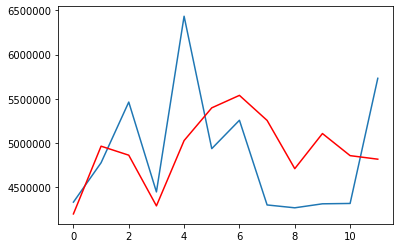

In [179]:
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
mae= mean_absolute_error(raw_values[-12:], predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions, color="red")
pyplot.show()

### ARIMA

In [180]:
# evaluate an ARIMA model using a walk-forward validation
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

ImportError: cannot import name 'to_numpy' from 'statsmodels.compat.pandas' (C:\Users\ldr\anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

In [48]:
X=series.values
train1, test1 = X[0:-12], X[-12:len(X)]
history = [x for x in train1]
predictions = list()

predicted=4124952.493870, expected=4333075.000000
predicted=4793321.012529, expected=4778362.000000
predicted=4480095.609115, expected=5463750.000000
predicted=4349375.809649, expected=4448565.000000
predicted=4701944.144052, expected=6433557.000000
predicted=5049957.582765, expected=4937614.000000
predicted=5264042.006787, expected=5258279.000000
predicted=5082416.748091, expected=4301305.000000
predicted=4857936.140425, expected=4269067.000000
predicted=4659502.154984, expected=4314227.000000
predicted=4310458.485186, expected=4318213.000000
predicted=4322987.724387, expected=5732314.000000
Test RMSE: 768899.030


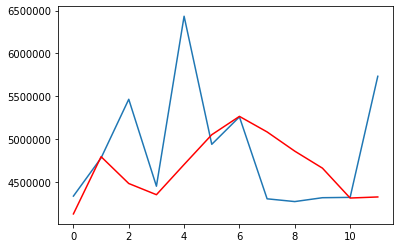

In [56]:
# walk-forward validation
for t in range(len(test1)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test1[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

rmse = sqrt(mean_squared_error(test1, predictions))
mae= mean_absolute_error(test1, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test1)
pyplot.plot(predictions, color='red')
pyplot.show()

### EST

In [181]:
series0=read_csv(r"C:\Users\ldr\Desktop\NC project\Donation_data_monthly1.csv", usecols=[1,2], index_col=0, parse_dates=[0], header=0, squeeze=True)

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print( series0)

Date
2006-07-15    3033041.0
2006-08-15    2389606.0
2006-09-15    2148315.0
2006-10-15    2437946.0
2006-11-15    2348064.0
                ...    
2017-01-15    4301305.0
2017-02-15    4269067.0
2017-03-15    4314227.0
2017-04-15    4318213.0
2017-05-15    5732314.0
Name: Quantity, Length: 131, dtype: float64


In [183]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [184]:
model = ETSModel(
    series0,
    error="add",
    trend="add",
    seasonal="add",
    damped_trend=True,
    seasonal_periods=12,
)
fit = model.fit()

C:\Users\ldr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [185]:
pred = fit.get_prediction(start="2016-06", end="2017-05")

In [186]:
df=pred.summary_frame(alpha=0.05)

In [187]:
df["mean"].values

array([3980934.54118304, 5244729.26779751, 4608715.71454835,
       4387470.48490486, 4802307.38994379, 4849867.39122094,
       5127981.61428729, 4535947.72661663, 4493449.7177122 ,
       4672832.39570743, 4931916.4495036 , 4974792.72562277])

Test RMSE: 642030.809
Test MAE: 481065.475


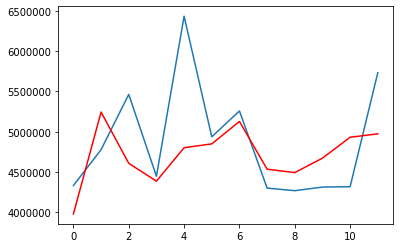

In [189]:
rmse = sqrt(mean_squared_error(test1, df["mean"].values))
print('Test RMSE: %.3f' % rmse)

mae= mean_absolute_error(test1, df["mean"].values)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test1, label='expected')
pyplot.plot(df["mean"].values, color='red',label="predicted")
pyplot.show()

### svr

In [190]:
from sklearn.svm import SVR

In [ ]:
series2=read_csv(r"C:\Users\ldr\Desktop\NC project\Donation_data_monthly1.csv", usecols=[1,2], index_col=0, parse_dates=[0],  header=0)

In [192]:
print(series2)

             Quantity
Date                 
2006-07-15  3033041.0
2006-08-15  2389606.0
2006-09-15  2148315.0
2006-10-15  2437946.0
2006-11-15  2348064.0
...               ...
2017-01-15  4301305.0
2017-02-15  4269067.0
2017-03-15  4314227.0
2017-04-15  4318213.0
2017-05-15  5732314.0

[131 rows x 1 columns]


In [193]:
X_train = []
y_train = []
for i in range(12, len(train_scaled)):
    X_train.append(train_scaled[i-12:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [194]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
svr_fit=regressor.fit(X_train, y_train)

In [195]:
X_test = []
y_test = []
for i in range(12, len(test_scaled)):
    X_test.append(test_scaled[i-12:i, 0])
    y_test.append(test_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


In [196]:
predicted_test=svr_fit.predict(X_test)
predicted_test=predicted_test.reshape(-1,1)
print(predicted_test)

[[0.49457173]
 [0.57384509]
 [0.48008491]
 [0.31899388]
 [0.52378477]
 [0.44870289]
 [0.56539959]
 [0.49512272]
 [0.43005326]
 [0.5681574 ]
 [0.43419381]
 [0.47486427]]


In [197]:
predicted_test=scaler.inverse_transform(predicted_test)

In [198]:
predictions = list()
raw_values=series.values
for i in range(12):
    yhat=predicted_test[i]
    yhat = inverse_difference(raw_values, yhat, 13-i)
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Month=1, Predicted=4774569.357588, Expected=3920419.000000
Month=2, Predicted=4789075.440816, Expected=5486601.220000
Month=3, Predicted=4897962.420897, Expected=4407472.000000
Month=4, Predicted=5005375.551421, Expected=3947907.000000
Month=5, Predicted=4724955.175160, Expected=4495724.000000
Month=6, Predicted=6440562.570183, Expected=4425830.000000
Month=7, Predicted=5363313.038745, Expected=5007392.860000
Month=8, Predicted=5431833.251820, Expected=3404507.500000
Month=9, Predicted=4241397.988531, Expected=4303216.000000
Month=10, Predicted=4704660.723130, Expected=4277253.000000
Month=11, Predicted=4269175.765554, Expected=4257763.000000
Month=12, Predicted=4419082.408627, Expected=4602992.000000


Test RMSE: 874293.640
Test MAE: 650190.848


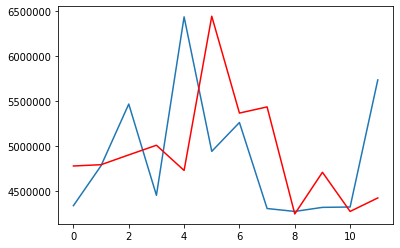

In [200]:
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
mae= mean_absolute_error(raw_values[-12:], predictions)
print('Test MAE: %.3f' % mae)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions, color="red")
pyplot.show()